In [1]:
import json
import os
import grid2op
import numpy as np
from grid2op.PlotGrid import PlotMatplot
from lightsim2grid import LightSimBackend
from grid2op.Agent import DoNothingAgent
from grid2op.Runner import Runner
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.auto import tqdm  # for easy progress bar
import pandas as pd
from grid2op.Episode import EpisodeData
from ray.rllib.algorithms import ppo
from mahrl.evaluation.evaluation_agents import RllibAgent
from mahrl.grid2op_env.custom_environment import CustomizedGrid2OpEnvironment
from mahrl.grid2op_env.custom_env2 import RlGrid2OpEnv
from mahrl.experiments.yaml import load_config
from mahrl.evaluation.utils import instantiate_reward_class

In [224]:
studie_path = "/Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/"
test_case = "CustomPPO_RlGrid2OpEnv_6fdf8_00000_0_2024-05-06_05-12-14"
def get_env_config(studie_path, test_case):
    agent_path = os.path.join(studie_path, test_case)
    # load config
    config_path = os.path.join(agent_path, "params.json")
    config = load_config(config_path)
    env_config = config["env_config"]
    # adjust lib_dir:
    env_config["lib_dir"] = "/Users/ericavandersar/Documents/Python_Projects/Research/mahrl_grid2op/" 
    # Overwrite file params
    config["env_config"] = env_config
    with open(config_path, "w") as outfile: 
        json.dump(config, outfile, indent=4)
    
    # change the env_name from _train to _test
    env_config["env_name"] = env_config["env_name"].replace("_train", "")
    # adjust reward class
    env_config["grid2op_kwargs"]["reward_class"] = instantiate_reward_class(
            env_config["grid2op_kwargs"]["reward_class"]
        )
    
    
    return env_config, agent_path

In [3]:
checkpoint_name = "checkpoint_000028"
ENV_TYPE = RlGrid2OpEnv

env = grid2op.make(env_config["env_name"], backend=LightSimBackend())

agent = RllibAgent(
    action_space=env.action_space,
    env_config=env_config,
    file_path=agent_path,
    policy_name="reinforcement_learning_policy",
    algorithm=ppo.PPO,
    checkpoint_name=checkpoint_name,
    gym_wrapper=ENV_TYPE(env_config),
    )

action_space is  medha_dn_optshunt
number possible sub actions:  140
Observation attributes used are:  ['topo_vect', 'load_p', 'gen_p', 'p_ex', 'p_or', 'rho', 'timestep_overflow']
Load policy from:
 /Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/CustomPPO_RlGrid2OpEnv_6fdf8_00000_0_2024-05-06_05-12-14/checkpoint_000028/policies/reinforcement_learning_policy
setup environment


In [4]:
store_trajectories_folder = os.path.join(agent_path, "evaluation_episodes")

chronics = "0020  0047  0076  0129  0154  0164  0196  0230  0287  0332  0360  0391  0454  0504  0516  0539  0580  0614  0721  0770  0842  0868  0879  0925  0986 0023  0065  0103  0141  0156  0172  0206  0267  0292  0341  0369  0401  0474  0505  0529  0545  0595  0628  0757  0774  0844  0869  0891  0950  0993 0026  0066  0110  0144  0157  0179  0222  0274  0303  0348  0381  0417  0481  0511  0531  0547  0610  0636  0763  0779  0845  0870  0895  0954  0995 0030  0075  0128  0153  0162  0192  0228  0286  0319  0355  0387  0418  0486  0513  0533  0565  0612  0703  0766  0812  0852  0871  0924  0962  1000"
test_chronics = chronics.split()
NB_EPISODE = len(test_chronics)

In [4]:
obs = env.reset()
action = agent.act(obs,0)
print(action)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration


In [104]:
def run_evalution(agent_path,
                  checkpoint,
                  env_config, 
                  env_type, 
                  chronics, 
                  nb_episodes)
    env = grid2op.make(env_config["env_name"], backend=LightSimBackend())
    
    agent = RllibAgent(
        action_space=env.action_space,
        env_config=env_config,
        file_path=agent_path,
        policy_name="reinforcement_learning_policy",
        algorithm=ppo.PPO,
        checkpoint_name=checkpoint,
        gym_wrapper=RlGrid2OpEnv(env_config),
        )
    runner = Runner(
        **env.get_params_for_runner(),
        agentClass=None,
        agentInstance=agent
        )
    res = runner.run(
        nb_episode=nb_episodes,
        pbar=tqdm,
        episode_id=test_chronics,
        path_save=os.path.abspath(store_trajectories_folder),
    ) 
    
    ts_surv = []
    for _, chron_id, cum_reward, nb_time_step, max_ts in res:
        msg_tmp = "\tFor chronics with id {}\n".format(chron_id)
        msg_tmp += "\t\t - cumulative reward: {:.6f}\n".format(cum_reward)
        msg_tmp += "\t\t - number of time steps completed: {:.0f} / {:.0f}".format(nb_time_step, max_ts)
        print(msg_tmp)
        ts_surv.append(nb_time_step)
    print(f"\nAverage timesteps survived: {np.mean(ts_surv)}\n{ts_surv}\n")

episode:   0%|          | 0/100 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

episode:   0%|          | 0/8064 [00:00<?, ?it/s]

	For chronics with id 0020
		 - cumulative reward: 507867.531250
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0047
		 - cumulative reward: 505204.437500
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0076
		 - cumulative reward: 505884.500000
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0129
		 - cumulative reward: 502722.000000
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0154
		 - cumulative reward: 501482.062500
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0164
		 - cumulative reward: 503599.687500
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0196
		 - cumulative reward: 501856.593750
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0230
		 - cumulative reward: 504116.000000
		 - number of time steps completed: 8064 / 8064
	For chronics with id 0287
		 - cumulative reward: 508502.250000
		 - number of time ste

In [62]:
li_episode = EpisodeData.list_episode(store_trajectories_folder)
li_episode

[('/Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/CustomPPO_RlGrid2OpEnv_6fdf8_00000_0_2024-05-06_05-12-14/evaluation_episodes',
  '0020'),
 ('/Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/CustomPPO_RlGrid2OpEnv_6fdf8_00000_0_2024-05-06_05-12-14/evaluation_episodes',
  '0023'),
 ('/Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/CustomPPO_RlGrid2OpEnv_6fdf8_00000_0_2024-05-06_05-12-14/evaluation_episodes',
  '0026'),
 ('/Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/CustomPPO_RlGrid2OpEnv_6fdf8_00000_0_2024-05-06_05-12-14/evaluation_episodes',
  '0030'),
 ('/Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/CustomPPO_RlGrid2OpEnv_6fdf8_00000_0_2024-05-06_05-12-14/evaluation_episodes',
  '0047'),
 ('/Users/ericavandersar/surfdrive/Documents/Research/Result/Case14_Sandbox_ActSpaces/CustomPPO_RlGrid2OpEnv_6fdf8_00000

In [106]:
full_path, episode_studied = li_episode[0]
this_episode = EpisodeData.from_disk(store_trajectories_folder, episode_studied)

In [107]:
this_episode.get_actions()

array([[ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       ...,
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]], dtype=float32)

In [108]:
import time

In [109]:
t = time.time()
env.observation_space.from_vect(this_episode.get_observations()[0]).rho
time.time() - t

0.006482839584350586

In [110]:
idx = env.observation_space.shape
pos = env.observation_space.attr_list_vect.index('rho')
start = sum(idx[:pos])
end = start + idx[pos]

In [111]:
t = time.time()
this_episode.get_observations()[0][...,np.arange(start, end)]
time.time() - t

0.0004601478576660156

In [112]:
this_episode.meta['nb_timestep_played']

8064

# Get TOPOLOGY data from episode

In [113]:
idx = env.observation_space.shape
pos = env.observation_space.attr_list_vect.index('topo_vect')
start = sum(idx[:pos])
end = start + idx[pos]
this_episode.get_observations()[0][...,np.arange(start, end)]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.], dtype=float32)

In [114]:
topo = this_episode.get_observations()[0:3005][...,np.arange(start, end)]
topo

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

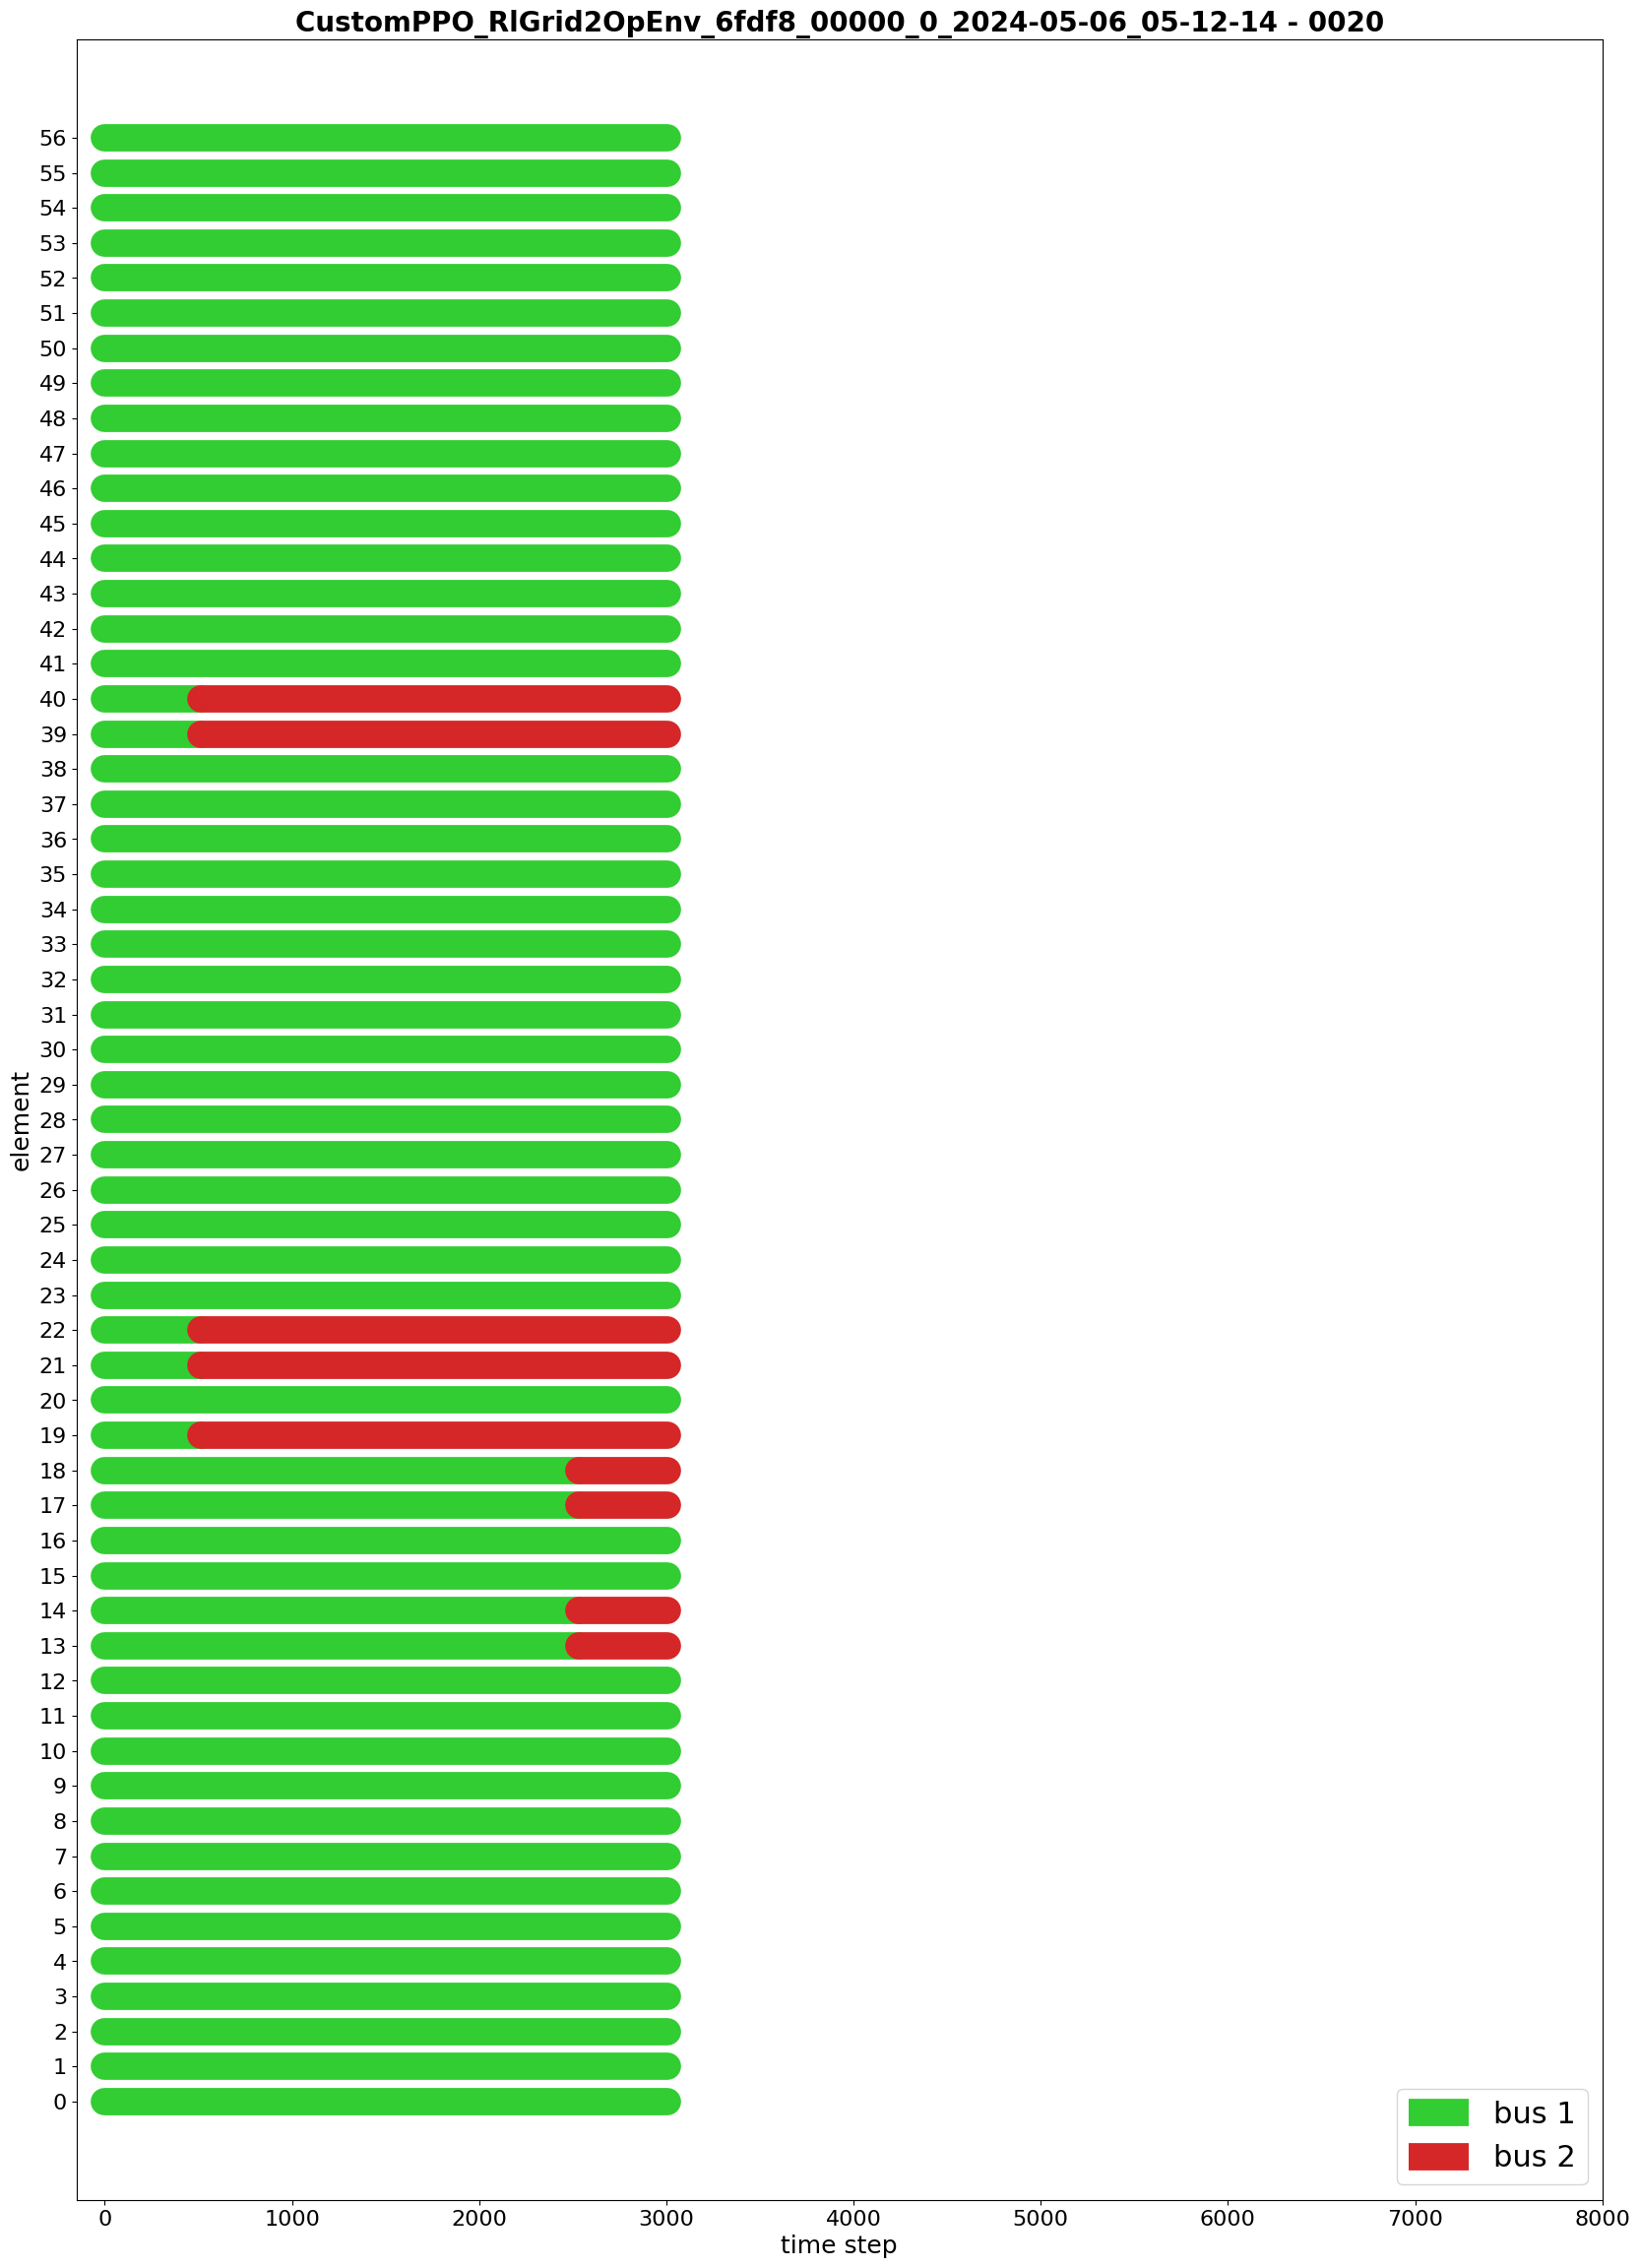

In [115]:
def plot_topo_config(topo):
    fig = plt.figure(figsize=(20, topo.shape[1] / 2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(f"{test_case} - {episode_studied}", fontsize=20, fontweight="bold")
    colors = ['limegreen', 'tab:red', 'silver']
    curr = 1
    for j in range(topo.shape[1]):
        start_pos = 0
        end_pos = 0
        for i in range(topo.shape[0]):
            if topo[:, j][i] != curr:
                plt.hlines(y=j, xmin=start_pos, xmax=end_pos,
                           color=colors[curr - 1] if curr>0 else colors[curr], lw=20, label='bus ' + str(curr))
                curr = int(topo[:, j][i])
                start_pos = end_pos
            end_pos += 1
        plt.hlines(y=j, xmin=start_pos, xmax=end_pos, color=colors[curr - 1] if curr>0 else colors[curr], lw=20, label='bus ' + str(curr))
    
    ax.set_ylabel("element", fontsize=18)
    ax.set_xlabel("time step", fontsize=18)
    plt.xticks(np.arange(8064, step=1000), fontsize=16)
    plt.yticks(np.arange(topo.shape[1]), fontsize=16)
    handles, labels = ax.get_legend_handles_labels()
    indexes = [labels.index(x) for x in set(labels)]
    ax.legend([handle for i, handle in enumerate(handles) if i in indexes],
              [label for i, label in enumerate(labels) if i in indexes], fontsize=22, loc='lower right')
    plt.show()
plot_topo_config(topo)

## Try a different episode

In [154]:
full_path, episode_studied = li_episode[1]
this_episode = EpisodeData.from_disk(store_trajectories_folder, episode_studied)

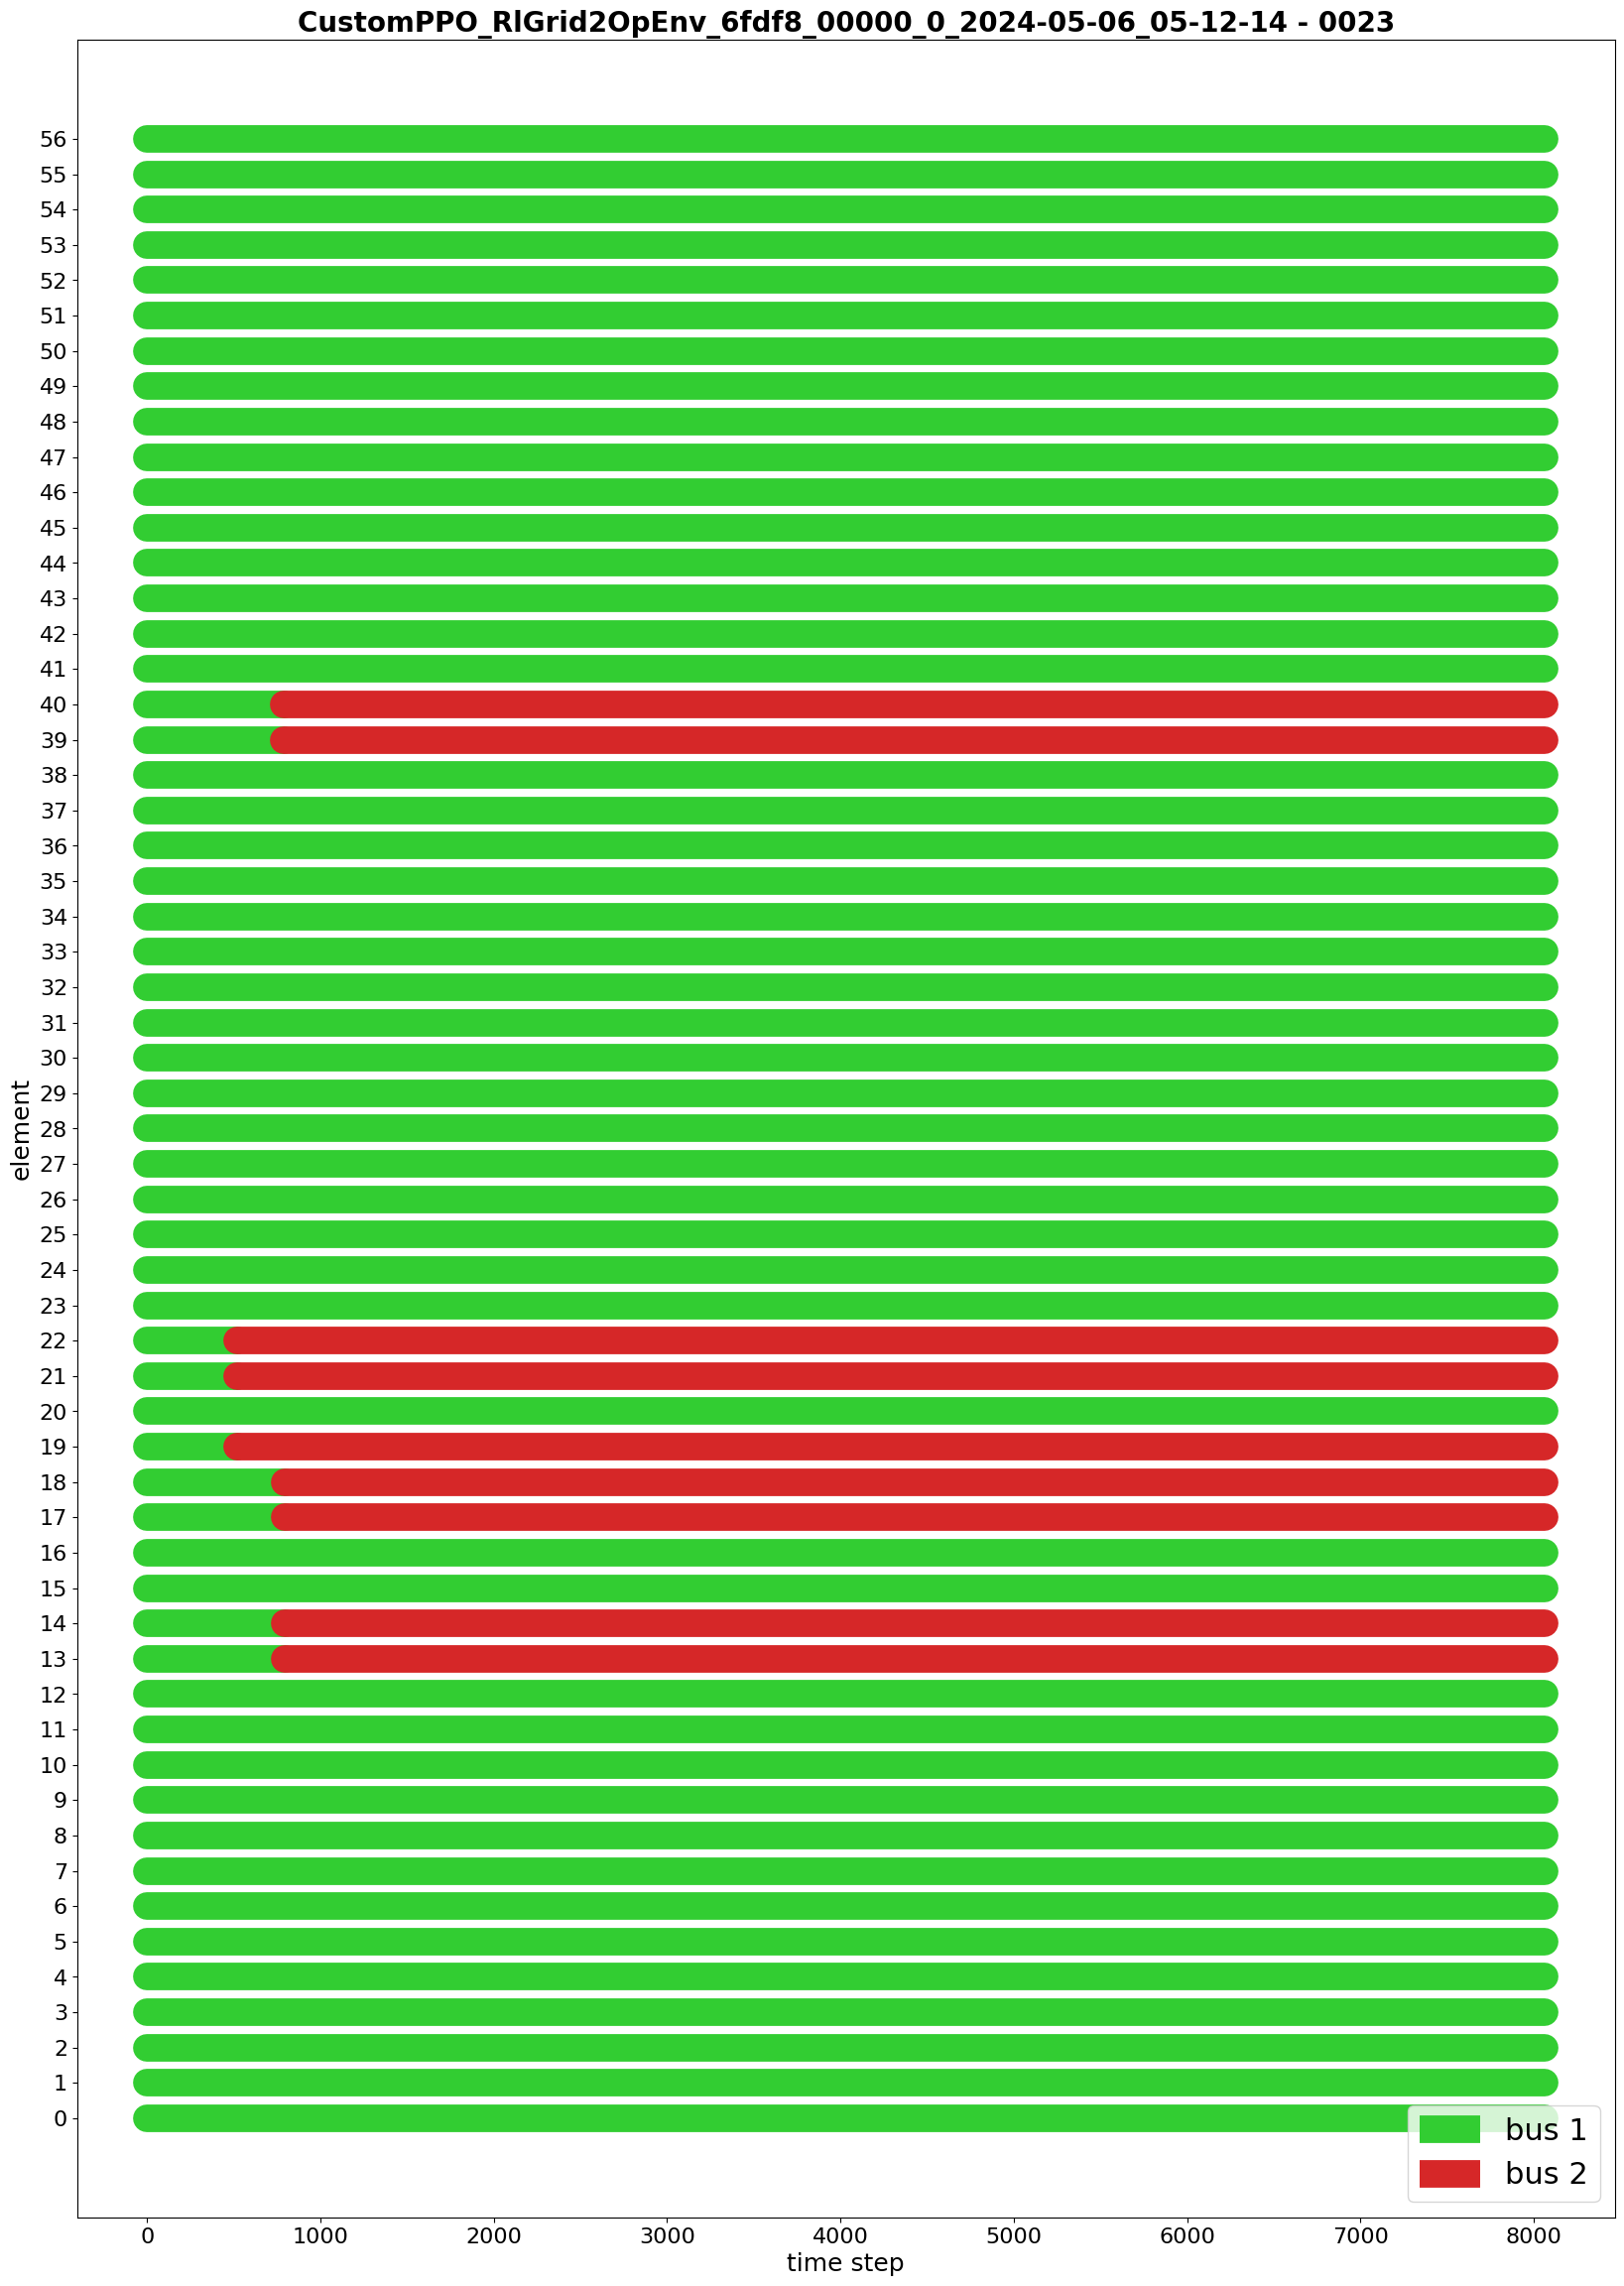

In [117]:
topo = this_episode.get_observations()[0:this_episode.meta['nb_timestep_played']][...,np.arange(start, end)]
plot_topo_config(topo)

In [156]:
idx = env.observation_space.shape
pos = env.observation_space.attr_list_vect.index('rho')
start = sum(idx[:pos])
end = start + idx[pos]
rho_values = this_episode.get_observations()[0:this_episode.meta['nb_timestep_played']][...,np.arange(start, end)]

In [157]:
ts_overflow, line_overflow = np.where(rho_values>env_config["rho_threshold"])
print(f'timestep danger: {ts_overflow} \nlines in danger {line_overflow}')

timestep danger: [519 785 795 807 809 811 812 813 814 815 818] 
lines in danger [17 17 17 16 16 16 16 16 16 16 16]


In [158]:
idx = env.action_space.shape
pos = env.action_space.attr_list_vect.index('_set_topo_vect')
start = sum(idx[:pos])
end = start + idx[pos]
actions = this_episode.get_actions()[ts_overflow][...,np.arange(start, end)]
actions

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 1., 2., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 1.,
        1., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 1.,
        1., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

In [162]:
action_topo = [list(act[act!=0].astype(int)) if any(act!=0) else [0] for act in actions]
action_topo

[[2, 1, 2, 2, 1],
 [1, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2],
 [2, 2, 1, 1, 2, 2]]

In [147]:
sub_topos = {f"sub_{sub}":{} for sub in range(env.n_sub)}
for act in actions:
    sub_act = env._topo_vect_to_sub[np.where(act!=0)][0]
    if f"{act[act!=0]}" in sub_topos[f"sub_{sub_act}"]:
        sub_topos[f"sub_{sub_act}"][f"{act[act!=0]}"] += 1
    else:
        sub_topos[f"sub_{sub_act}"] = {f"{act[act!=0]}" : 1}
    print(f"Substations changed: {sub_act} - {act[act!=0]}")
sub_topos

Substations changed: 4 - [2. 1. 2. 2. 1.]
Substations changed: 8 - [1. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]
Substations changed: 3 - [2. 2. 1. 1. 2. 2.]


{'sub_0': {},
 'sub_1': {},
 'sub_2': {},
 'sub_3': {'[2. 2. 1. 1. 2. 2.]': 9},
 'sub_4': {'[2. 1. 2. 2. 1.]': 1},
 'sub_5': {},
 'sub_6': {},
 'sub_7': {},
 'sub_8': {'[1. 1. 1. 2. 2.]': 1},
 'sub_9': {},
 'sub_10': {},
 'sub_11': {},
 'sub_12': {},
 'sub_13': {}}

In [177]:
def get_action_data(env, this_episode, input_data=None):
    
    # get data lines in overflow
    idx = env.observation_space.shape
    pos = env.observation_space.attr_list_vect.index('rho')
    start = sum(idx[:pos])
    end = start + idx[pos]
    rho_values = this_episode.get_observations()[0:this_episode.meta['nb_timestep_played']][...,np.arange(start, end)]
    ts_danger, line_danger = np.where(rho_values>env_config["rho_threshold"])
    rho = rho_values[rho_values>env_config["rho_threshold"]]

    # get actions
    idx = env.action_space.shape
    pos = env.action_space.attr_list_vect.index('_set_topo_vect')
    start = sum(idx[:pos])
    end = start + idx[pos]
    actions = this_episode.get_actions()[ts_danger][...,np.arange(start, end)]
    action_sub = [env._topo_vect_to_sub[act!=0][0] if any(act!=0) else 15 for act in actions]
    action_topo = [list(act[act!=0].astype(int)) if any(act!=0) else [0] for act in actions]

    # get new topology and topological distances
    idx = env.observation_space.shape
    pos = env.observation_space.attr_list_vect.index('topo_vect')
    start = sum(idx[:pos])
    end = start + idx[pos]

    # check current topo (before changed)
    topos = this_episode.get_observations()[ts_danger][...,np.arange(start, end)]
    subs_curr = [np.unique(env._topo_vect_to_sub[topo!=1]) if any(topo!=1) else [0] for topo in topos]
    
    # check the new topos (ts_danger+1)
    topos = this_episode.get_observations()[ts_danger+1][...,np.arange(start, end)]
    subs_changed = [np.unique(env._topo_vect_to_sub[topo!=1]) if any(topo!=1) else [0] for topo in topos]
    sub_topo_depth = [len(changed) for changed in subs_changed]
    el_changed = [np.nonzero(topo==2)[0] for topo in topos]
    el_topo_depth = [len(changed) for changed in el_changed]
    # chronic ids
    chron_id = [this_episode.name for _ in ts_danger]

    if input_data == None:
        data = {}
        data["chron_id"] = chron_id
        data["ts_danger"] = ts_danger
        data["line_danger"] = line_danger
        data["rho"] = rho
        data["action_sub"] = action_sub
        data["action_topo"] = action_topo
        data["subs_changed"] = subs_changed
        data["sub_topo_depth"] = sub_topo_depth
        data["el_changed"] = el_changed
        data["el_topo_depth"] = el_topo_depth
        # data["topo"] = topos
    else:
        data = input_data
        data["chron_id"].extend(chron_id)
        data["ts_danger"] = np.append(data["ts_danger"],ts_danger)
        data["line_danger"] = np.append(data["line_danger"] ,line_danger) 
        data["rho"] = np.append(data["rho"], rho)
        data["action_sub"].extend(action_sub)
        data["action_topo"].extend(action_topo)
        data["subs_changed"].extend(subs_changed)
        data["sub_topo_depth"].extend(sub_topo_depth)
        data["el_changed"].extend(el_changed)
        data["el_topo_depth"].extend(el_topo_depth)
        # data["topo"] = np.append(data["topo"], topos)
    
    return data
    

In [178]:
all_data = None
for ep in tqdm(li_episode[:5], total = 5):
    full_path, episode_studied = ep
    this_episode = EpisodeData.from_disk(store_trajectories_folder, episode_studied)
    all_data = get_action_data(env, this_episode, all_data)

  0%|          | 0/5 [00:00<?, ?it/s]

In [179]:
[len(val) for key,val in all_data.items()]

[40, 40, 40, 40, 40, 40, 40, 40, 40, 40]

In [180]:
df = pd.DataFrame(all_data)
df

,chron_id,ts_danger,line_danger,rho,action_sub,action_topo,subs_changed,sub_topo_depth,el_changed,el_topo_depth
0,0020,513,17,0.955241,4,"[2, 1, 2, 2, 1]",[4],1,"[19, 21, 22]",3
1,0020,514,17,0.950289,8,"[1, 1, 1, 2, 2]","[4, 8]",2,"[19, 21, 22, 39, 40]",5
2,0020,2533,17,0.953320,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
3,0020,6741,9,0.951646,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
4,0020,6742,9,0.959879,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
5,0020,6743,9,0.956162,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
6,0020,6744,9,0.965621,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
7,0020,6745,9,0.973284,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
8,0020,6746,9,0.963417,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
9,0020,6747,9,0.966929,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9


In [181]:
for ep in tqdm(li_episode[5:100], total = 95):
    full_path, episode_studied = ep
    this_episode = EpisodeData.from_disk(store_trajectories_folder, episode_studied)
    all_data = get_action_data(env, this_episode, all_data)

  0%|          | 0/95 [00:00<?, ?it/s]

In [182]:
df = pd.DataFrame(all_data)
df.to_csv(os.path.join(store_trajectories_folder,"line_action_topo_data.csv"))
df

,chron_id,ts_danger,line_danger,rho,action_sub,action_topo,subs_changed,sub_topo_depth,el_changed,el_topo_depth
0,0020,513,17,0.955241,4,"[2, 1, 2, 2, 1]",[4],1,"[19, 21, 22]",3
1,0020,514,17,0.950289,8,"[1, 1, 1, 2, 2]","[4, 8]",2,"[19, 21, 22, 39, 40]",5
2,0020,2533,17,0.953320,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
3,0020,6741,9,0.951646,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
4,0020,6742,9,0.959879,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
5,0020,6743,9,0.956162,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
6,0020,6744,9,0.965621,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
7,0020,6745,9,0.973284,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
8,0020,6746,9,0.963417,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9
9,0020,6747,9,0.966929,3,"[2, 2, 1, 1, 2, 2]","[3, 4, 8]",3,"[13, 14, 17, 18, 19, 21, 22, 39, 40]",9


In [187]:
df = pd.read_csv(os.path.join(store_trajectories_folder,"line_action_topo_data.csv"))
df

,Unnamed: 0,chron_id,ts_danger,line_danger,rho,action_sub,action_topo,subs_changed,sub_topo_depth,el_changed,el_topo_depth
0,0,20,513,17,0.955241,4,"[2, 1, 2, 2, 1]",[4],1,[19 21 22],3
1,1,20,514,17,0.950289,8,"[1, 1, 1, 2, 2]",[4 8],2,[19 21 22 39 40],5
2,2,20,2533,17,0.953320,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
3,3,20,6741,9,0.951646,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
4,4,20,6742,9,0.959878,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
5,5,20,6743,9,0.956162,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
6,6,20,6744,9,0.965621,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
7,7,20,6745,9,0.973284,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
8,8,20,6746,9,0.963417,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
9,9,20,6747,9,0.966929,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9


In [188]:
df = df.drop(['Unnamed: 0'],axis=1)
df

,chron_id,ts_danger,line_danger,rho,action_sub,action_topo,subs_changed,sub_topo_depth,el_changed,el_topo_depth
0,20,513,17,0.955241,4,"[2, 1, 2, 2, 1]",[4],1,[19 21 22],3
1,20,514,17,0.950289,8,"[1, 1, 1, 2, 2]",[4 8],2,[19 21 22 39 40],5
2,20,2533,17,0.953320,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
3,20,6741,9,0.951646,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
4,20,6742,9,0.959878,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
5,20,6743,9,0.956162,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
6,20,6744,9,0.965621,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
7,20,6745,9,0.973284,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
8,20,6746,9,0.963417,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9
9,20,6747,9,0.966929,3,"[2, 2, 1, 1, 2, 2]",[3 4 8],3,[13 14 17 18 19 21 22 39 40],9


In [189]:
all_data = df.to_dict(orient='list')

In [190]:
df.line_danger.value_counts()

9     685
16    436
17    244
4      26
7       8
Name: line_danger, dtype: int64

In [191]:
df.action_sub.value_counts()

3    1194
4     103
8     102
Name: action_sub, dtype: int64

In [192]:
df.action_topo.value_counts()

[2, 2, 1, 1, 2, 2]    1141
[2, 1, 2, 2, 1]        103
[1, 1, 1, 2, 2]        102
[2, 2, 1, 2, 1, 2]      53
Name: action_topo, dtype: int64

In [193]:
df.subs_changed.value_counts()

[3 4 8]                                        1169
[4 8]                                            87
[4]                                              54
[8]                                              47
[3 4]                                            26
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]       9
[3 8]                                             6
[3]                                               1
Name: subs_changed, dtype: int64

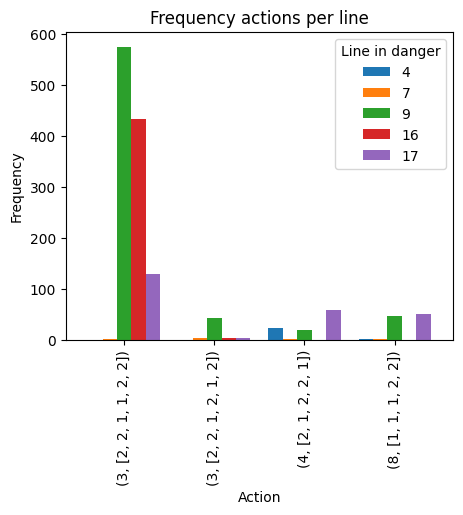

In [212]:
# Create a pivot table to count occurrences of 'action topo' for each 'action sub'
pivot_table = df.pivot_table(index=['action_sub', 'action_topo'], columns='line_danger', aggfunc='size', fill_value=0)

# Plotting the data
ax = pivot_table.plot(kind='bar', figsize=(5, 4), width=0.8)

# Customize the plot
ax.set_title('Frequency actions per line')
ax.set_xlabel('Action')
ax.set_ylabel('Frequency')
ax.legend(title='Line in danger')

plt.show()

In [195]:
df.el_changed.value_counts()

[13 14 17 18 19 21 22 39 40]    1123
[19 21 22 39 40]                  87
[19 21 22]                        54
[39 40]                           47
[13 14 16 18 19 21 22 39 40]      46
[13 14 17 18 19 21 22]            20
[]                                 9
[13 14 16 18 19 21 22]             6
[13 14 16 18 39 40]                4
[13 14 17 18 39 40]                2
[13 14 16 18]                      1
Name: el_changed, dtype: int64

In [196]:
len(df.el_changed.unique())

11

In [206]:
df.line_danger.value_counts()

9     685
16    436
17    244
4      26
7       8
Name: line_danger, dtype: int64

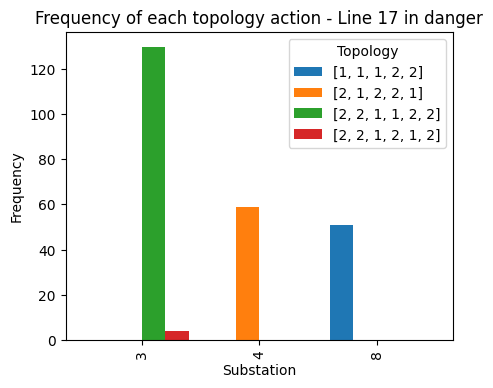

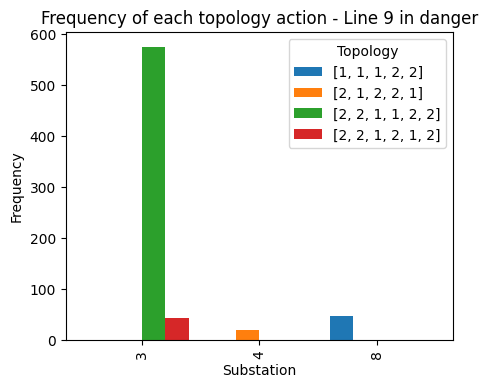

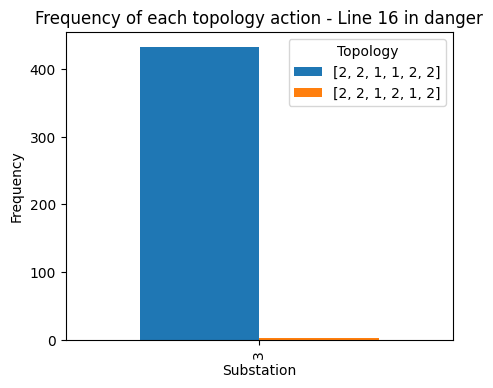

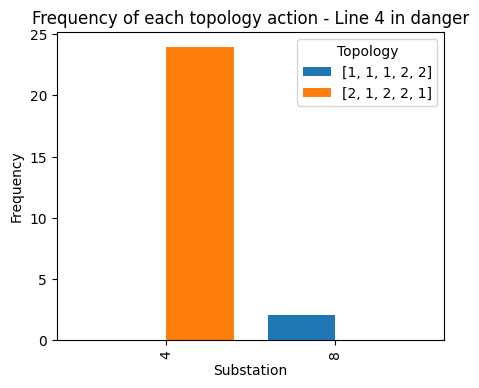

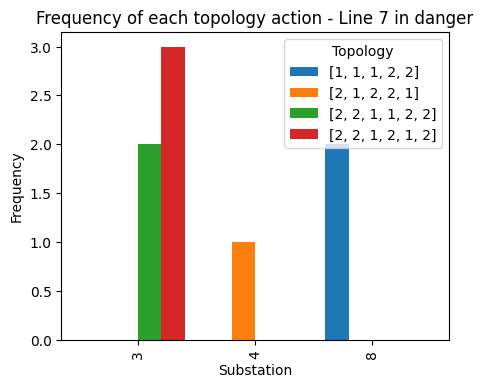

In [209]:
for line in df.line_danger.unique():
    # Create a pivot table to count occurrences of 'action topo' for each 'action sub'
    pivot_table = df[df["line_danger"]==line].pivot_table(index='action_sub', columns='action_topo', aggfunc='size', fill_value=0)
    
    # Plotting the data
    ax = pivot_table.plot(kind='bar', figsize=(5, 4), width=0.8)
    
    # Customize the plot
    ax.set_title(f'Frequency of each topology action - Line {line} in danger')
    ax.set_xlabel('Substation')
    ax.set_ylabel('Frequency')
    ax.legend(title='Topology')
    
    plt.show()

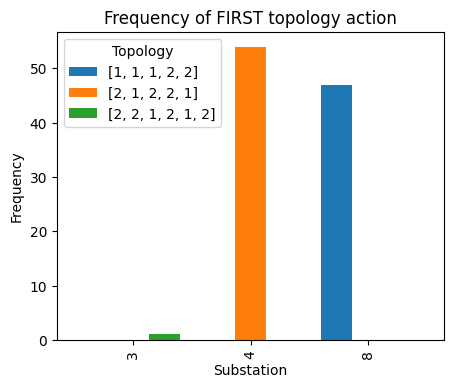

In [214]:
# Create a pivot table to count occurrences of 'action topo' for each 'action sub'
pivot_table = df[df["sub_topo_depth"]==1].pivot_table(index='action_sub', columns='action_topo', aggfunc='size', fill_value=0)

# Plotting the data
ax = pivot_table.plot(kind='bar', figsize=(5, 4), width=0.8)

# Customize the plot
ax.set_title(f'Frequency of FIRST topology action')
ax.set_xlabel('Substation')
ax.set_ylabel('Frequency')
ax.legend(title='Topology')

plt.show()

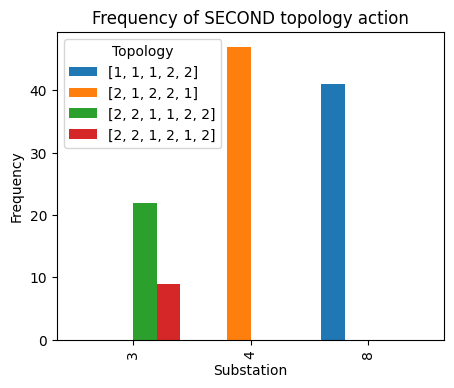

In [216]:
# Create a pivot table to count occurrences of 'action topo' for each 'action sub'
pivot_table = df[df["sub_topo_depth"]==2].pivot_table(index='action_sub', columns='action_topo', aggfunc='size', fill_value=0)

# Plotting the data
ax = pivot_table.plot(kind='bar', figsize=(5, 4), width=0.8)

# Customize the plot
ax.set_title(f'Frequency of SECOND topology action')
ax.set_xlabel('Substation')
ax.set_ylabel('Frequency')
ax.legend(title='Topology')

plt.show()

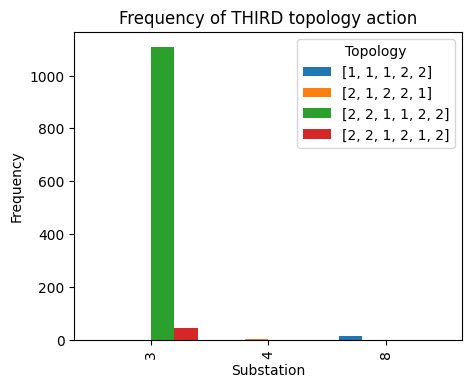

In [217]:
# Create a pivot table to count occurrences of 'action topo' for each 'action sub'
pivot_table = df[df["sub_topo_depth"]==3].pivot_table(index='action_sub', columns='action_topo', aggfunc='size', fill_value=0)

# Plotting the data
ax = pivot_table.plot(kind='bar', figsize=(5, 4), width=0.8)

# Customize the plot
ax.set_title(f'Frequency of THIRD topology action')
ax.set_xlabel('Substation')
ax.set_ylabel('Frequency')
ax.legend(title='Topology')

plt.show()

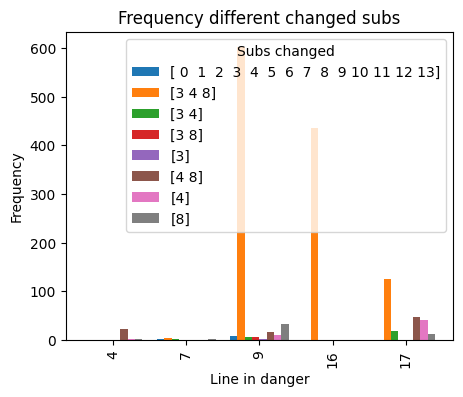

In [238]:
# Create a pivot table to count occurrences of 'action topo' for each 'action sub'
pivot_table = df.pivot_table(index=['line_danger'], columns='subs_changed', aggfunc='size', fill_value=0)

# Plotting the data
ax = pivot_table.plot(kind='bar', figsize=(5, 4), width=0.8)

# Customize the plot
ax.set_title('Frequency different changed subs')
ax.set_xlabel('Line in danger')
ax.set_ylabel('Frequency')
ax.legend(title='Subs changed')

plt.show()

In [237]:
df.sub_topo_depth.unique()[-2]

3